In [1]:
print ("hello world")

hello world


In [2]:
# %load ../train_and_append_boosted.py
import statistics
import collections
import getopt, sys
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace
import pandas
import math
from sklearn.preprocessing import StandardScaler
import root_numpy
from ROOT import gSystem
from root_numpy import root2array, array2tree
import time
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import plot_model
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import ROOT
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle


Welcome to JupyROOT 6.14/04


Using TensorFlow backend.


In [3]:
class MyDict(collections.OrderedDict):
    def __missing__(self, key):
        val = self[key] = MyDict()
        return val


In [151]:
# This converts a flat ntuple into a numpy array file, which is the input
# format used by keras in our setup. Creates one .npz file per analysis in the
# directory where you run it.

# Location of the lists of ntuples you want to convert to numpy format.
# I've assumed that the file lists are named following my convention.
# e.g. "signalFiles_resolved.txt"
fileListLocation = "../datasets_to_train/"
appendListLocation = "../datasets_to_append/"

# Name of the tree we want to use
inTreeName = "preselection"

# Prefix for the name of the output .npz files
outputPrefix = "trainingData_all_jets_"
#outputPrefix = "validationData_"

#for analysis in ["resolved", "intermediate", "boosted"]:
for analysis in ["resolved"]:
    inFile_sig   = fileListLocation + "/signalFiles_" + analysis + ".txt"
    inFile_4b    = fileListLocation + "/4bFiles_" + analysis + "_small.txt"
    inFile_2b2j  = fileListLocation + "/2b2jFiles_" + analysis + "_small.txt"
    inFile_ttbar = fileListLocation + "/ttbarFiles_" + analysis + "_small.txt"
    inFile_sig_scm10     = fileListLocation + "/signalFiles_" + analysis + "_SlfCoup_m10.txt"
    inFile_sig_scm20     = fileListLocation + "/signalFiles_" + analysis + "_SlfCoup_m20.txt"
    inFile_sig_scm2      = fileListLocation + "/signalFiles_" + analysis + "_SlfCoup_m2.txt"
    inFile_sig_scm5      = fileListLocation + "/signalFiles_" + analysis + "_SlfCoup_m5.txt"
    inFile_sig_scm0p5    = fileListLocation + "/signalFiles_" + analysis + "_SlfCoup_m0.5.txt"
    inFile_sig_sc0p5     = fileListLocation + "/signalFiles_" + analysis + "_SlfCoup_0.5.txt"
    inFile_sig_sc10      = fileListLocation + "/signalFiles_" + analysis + "_SlfCoup_10.txt"
    inFile_sig_sc20      = fileListLocation + "/signalFiles_" + analysis + "_SlfCoup_20.txt"
    inFile_sig_sc2       = fileListLocation + "/signalFiles_" + analysis + "_SlfCoup_2.txt"
    inFile_sig_sc5       = fileListLocation + "/signalFiles_" + analysis + "_SlfCoup_5.txt"

    
    appendFile_sig   = appendListLocation + "/signalFiles_" + analysis + ".txt"
    appendFile_4b    = appendListLocation + "/4bFiles_" + analysis + ".txt"
    appendFile_2b2j  = appendListLocation + "/2b2jFiles_" + analysis + ".txt"
    appendFile_ttbar = appendListLocation + "/ttbarFiles_" + analysis + ".txt"

    branchList = ["pT_hh","m_hh",
                  "nMuon", "nElec",
                  "h1_M", "h1_Pt", "h1_Eta", "h1_Phi", "h1_j1_j2_dR",
                  "h2_M", "h2_Pt", "h2_Eta", "h2_Phi", "h2_j1_j2_dR",
                  "h1_j1_M", "h1_j1_Pt", "h1_j1_Eta", "h1_j1_Phi", 
                  "h1_j2_M", "h1_j2_Pt", "h1_j2_Eta", "h1_j2_Phi", 
                  "h2_j1_M", "h2_j1_Pt", "h2_j1_Eta", "h2_j1_Phi", 
                  "h2_j2_M", "h2_j2_Pt", "h2_j2_Eta", "h2_j2_Phi", 
                  "met_Et", "met_Phi", 
                  "h1_j1_BTag","h1_j2_BTag","h2_j1_BTag","h2_j2_BTag",
                  "mc_sf"]

    nFeatures = len(branchList)-1

    filepaths_sig   = []
    filepaths_sig_scm10    = []
    filepaths_sig_scm20    = []
    filepaths_sig_scm2     = []
    filepaths_sig_scm5     = []
    filepaths_sig_scm0p5   = []
    filepaths_sig_sc0p5    = []
    filepaths_sig_sc10     = []
    filepaths_sig_sc20     = []
    filepaths_sig_sc2      = []
    filepaths_sig_sc5      = []

    filepaths_4b    = []
    filepaths_2b2j  = []
    filepaths_ttbar = []

    f = open(inFile_sig,"r")
    for line in f:
        filepaths_sig.append(line.rstrip())
    f.close()
    
    f = open(inFile_sig_scm10,"r")
    for line in f:
        filepaths_sig_scm10.append(line.rstrip())
    f.close()

    f = open(inFile_sig_scm20,"r")
    for line in f:
        filepaths_sig_scm20.append(line.rstrip())
    f.close()

    f = open(inFile_sig_scm2,"r")
    for line in f:
        filepaths_sig_scm2.append(line.rstrip())
    f.close()

    f = open(inFile_sig_scm5,"r")
    for line in f:
        filepaths_sig_scm5.append(line.rstrip())
    f.close()

    f = open(inFile_sig_scm0p5,"r")
    for line in f:
        filepaths_sig_scm0p5.append(line.rstrip())
    f.close()

    f = open(inFile_sig_sc0p5,"r")
    for line in f:
        filepaths_sig_sc0p5.append(line.rstrip())
    f.close()

    f = open(inFile_sig_sc10,"r")
    for line in f:
        filepaths_sig_sc10.append(line.rstrip())
    f.close()

    f = open(inFile_sig_sc20,"r")
    for line in f:
        filepaths_sig_sc20.append(line.rstrip())
    f.close()

    f = open(inFile_sig_sc2,"r")
    for line in f:
        filepaths_sig_sc2.append(line.rstrip())
    f.close()

    f = open(inFile_sig_sc5,"r")
    for line in f:
        filepaths_sig_sc5.append(line.rstrip())
    f.close()


    f = open(inFile_4b,"r")
    for line in f:
        filepaths_4b.append(line.rstrip())
    f.close()

    f = open(inFile_2b2j,"r")
    for line in f:
        filepaths_2b2j.append(line.rstrip())
    f.close()

    f = open(inFile_ttbar,"r")
    for line in f:
        filepaths_ttbar.append(line.rstrip())
    f.close()

    appendPaths_sig   = []
    appendPaths_4b    = []
    appendPaths_2b2j  = []
    appendPaths_ttbar = []

    f = open(appendFile_sig,"r")
    for line in f:
        appendPaths_sig.append(line.rstrip())
    f.close()

    f = open(appendFile_4b,"r")
    for line in f:
        appendPaths_4b.append(line.rstrip())
    f.close()

    f = open(appendFile_2b2j,"r")
    for line in f:
        appendPaths_2b2j.append(line.rstrip())
    f.close()

    f = open(appendFile_ttbar,"r")
    for line in f:
        appendPaths_ttbar.append(line.rstrip())
    f.close()

    dat_sig   = root2array(filepaths_sig,   branches=branchList, treename=inTreeName)
    dat_sig_scm10    = root2array(filepaths_sig_scm10 ,   branches=branchList, treename=inTreeName)
    dat_sig_scm20    = root2array(filepaths_sig_scm20 ,   branches=branchList, treename=inTreeName)
    dat_sig_scm2     = root2array(filepaths_sig_scm2  ,   branches=branchList, treename=inTreeName)
    dat_sig_scm5     = root2array(filepaths_sig_scm5  ,   branches=branchList, treename=inTreeName)
    dat_sig_scm0p5   = root2array(filepaths_sig_scm0p5,   branches=branchList, treename=inTreeName)
    dat_sig_sc0p5    = root2array(filepaths_sig_sc0p5 ,   branches=branchList, treename=inTreeName)
    dat_sig_sc10     = root2array(filepaths_sig_sc10  ,   branches=branchList, treename=inTreeName)
    dat_sig_sc20     = root2array(filepaths_sig_sc20  ,   branches=branchList, treename=inTreeName)
    dat_sig_sc2      = root2array(filepaths_sig_sc2   ,   branches=branchList, treename=inTreeName)
    dat_sig_sc5      = root2array(filepaths_sig_sc5   ,   branches=branchList, treename=inTreeName)

    dat_4b    = root2array(filepaths_4b,    branches=branchList, treename=inTreeName)
    dat_2b2j  = root2array(filepaths_2b2j,  branches=branchList, treename=inTreeName)
    dat_ttbar = root2array(filepaths_ttbar, branches=branchList, treename=inTreeName)
    datAppend_sig   = root2array(appendPaths_sig,   branches=branchList, treename=inTreeName)
    datAppend_4b    = root2array(appendPaths_4b,    branches=branchList, treename=inTreeName)
    datAppend_2b2j  = root2array(appendPaths_2b2j,  branches=branchList, treename=inTreeName)
    datAppend_ttbar = root2array(appendPaths_ttbar, branches=branchList, treename=inTreeName)

    #np.savez(outputPrefix + analysis + ".npz", sig=dat_sig, bkg_4b=dat_4b, bkg_2b2j=dat_2b2j, bkg_ttbar=dat_ttbar)


In [152]:
    nFeatures = len(branchList)-1


In [153]:
# This program trains a neural network based on input numpy array files.
# Output is one trained NN file (nn_*.h5) and one scaler file (scaler_*.sav)
# per analysis. Optionally also makes plots of the output distributions for the
# training sample.

### NOTE this program uses 0.2 of the data as a validation set

In [154]:
# Path of the directory whit lits of ntuples to append score to
fileListLocation = "test_append.txt"
# Path of the directory containing .npz files to train on.
# Standard naming convention is assumed (e.g. "trainingData_resolved.npz")
trainingDataPath = "../train_all_jets/"

In [155]:
# Training parameters
numEpochs = 10
batchSize = 100
dropoutFraction = 0.1
nNodes = 150
# initial learning rate for adamax
init_lr = MyDict()
init_lr["boosted"] = 5e-5
init_lr["intermediate"] = 5e-3
init_lr["resolved"] = 1e-1

# store parameters of the network in a string
#param_string = "_w_OPadamaxEP"+str(numEpochs)+"BS"+str(batchSize)+"DO"+str(dropoutFraction).replace(".","")
# Plot score distributions for the training sample?
makePlots = False

target_nevents = 100000

 
ttbar_weight = MyDict()
signal_weight = MyDict()
qcd_weight = MyDict()
analysis = "intermediate"
param_string = "testSave_all_jets_LR"+str(init_lr[analysis]).replace("0.","0p")
print ("paramters string "+param_string)

paramters string testSave_all_jets_LR0p005


In [156]:
# Load the input file and grab the data from it.
# Label each type of background
# Calculate weight for each 'target' sample
#inFile = np.load(trainingDataPath + "/trainingData_all_jets_" + analysis + ".npz")

signalData = pandas.DataFrame(dat_sig)
#signalData = pandas.DataFrame(inFile["sig"])
signalData["target"] = 0
#signal_weight[analysis] = target_nevents/len(signalData)
print(len(signalData),"(",signal_weight[analysis]["SM"],") signal (weight) events found")
n_sig = len(signalData)

signalAppendData = pandas.DataFrame(datAppend_sig)
signalAppendData["target"] = 0
print(len(signalAppendData),"(",signal_weight[analysis]["SM"],") signal (weight) events found")
n_sig = len(signalAppendData)
signal_weight[analysis]["SM"] = target_nevents/(len(signalData)+len(signalAppendData))
signalData = signalData.append(signalAppendData)

37382 ( MyDict() ) signal (weight) events found
38754 ( MyDict() ) signal (weight) events found


In [157]:
sig_scm20data = pandas.DataFrame(dat_sig_scm20)
sig_scm20data["target"] = 3
n_sig_scm20 = len(sig_scm20data)
signal_weight[analysis]["sig_scm20"] = target_nevents/len(sig_scm20data)
print(len(sig_scm20data),"(",signal_weight[analysis]["sig_scm20"],") sig_scm20 (weight) events found")

sig_scm10data = pandas.DataFrame(dat_sig_scm10)
sig_scm10data["target"] = 4
n_sig_scm10 = len(sig_scm10data)
signal_weight[analysis]["sig_scm10"] = target_nevents/len(sig_scm10data)
print(len(sig_scm10data),"(",signal_weight[analysis]["sig_scm10"],") sig_scm10 (weight) events found")

sig_scm2data = pandas.DataFrame(dat_sig_scm2)
sig_scm2data["target"] = 5
n_sig_scm2 = len(sig_scm2data)
signal_weight[analysis]["sig_scm2"] = target_nevents/len(sig_scm2data)
print(len(sig_scm2data),"(",signal_weight[analysis]["sig_scm2"],") sig_scm2 (weight) events found")

sig_scm5data = pandas.DataFrame(dat_sig_scm5)
sig_scm5data["target"] = 6
n_sig_scm5 = len(sig_scm5data)
signal_weight[analysis]["sig_scm5"] = target_nevents/len(sig_scm5data)
print(len(sig_scm5data),"(",signal_weight[analysis]["sig_scm5"],") sig_scm5 (weight) events found")

sig_scm0p5data = pandas.DataFrame(dat_sig_scm0p5)
sig_scm0p5data["target"] = 7
n_sig_scm0p5 = len(sig_scm0p5data)
signal_weight[analysis]["sig_scm0p5"] = target_nevents/len(sig_scm0p5data)
print(len(sig_scm0p5data),"(",signal_weight[analysis]["sig_scm0p5"],") sig_scm0p5 (weight) events found")

sig_sc0p5data = pandas.DataFrame(dat_sig_sc0p5)
sig_sc0p5data["target"] = 8
n_sig_sc0p5 = len(sig_sc0p5data)
signal_weight[analysis]["sig_sc0p5"] = target_nevents/len(sig_sc0p5data)
print(len(sig_sc0p5data),"(",signal_weight[analysis]["sig_sc0p5"],") sig_sc0p5 (weight) events found")

sig_sc10data = pandas.DataFrame(dat_sig_sc10)
sig_sc10data["target"] = 9
n_sig_sc10 = len(sig_sc10data)
signal_weight[analysis]["sig_sc10"] = target_nevents/len(sig_sc10data)
print(len(sig_sc10data),"(",signal_weight[analysis]["sig_sc10"],") sig_sc10 (weight) events found")

sig_sc20data = pandas.DataFrame(dat_sig_sc20)
sig_sc20data["target"] = 10
n_sig_sc20 = len(sig_sc20data)
signal_weight[analysis]["sig_sc20"] = target_nevents/len(sig_sc20data)
print(len(sig_sc20data),"(",signal_weight[analysis]["sig_sc20"],") sig_sc20 (weight) events found")

sig_sc2data = pandas.DataFrame(dat_sig_sc2)
sig_sc2data["target"] = 11
n_sig_sc2 = len(sig_sc2data)
signal_weight[analysis]["sig_sc2"] = target_nevents/len(sig_sc2data)
print(len(sig_sc2data),"(",signal_weight[analysis]["sig_sc2"],") sig_sc2 (weight) events found")

sig_sc5data = pandas.DataFrame(dat_sig_sc5)
sig_sc5data["target"] = 12
n_sig_sc5 = len(sig_sc5data)
signal_weight[analysis]["sig_sc5"] = target_nevents/len(sig_sc5data)
print(len(sig_sc5data),"(",signal_weight[analysis]["sig_sc5"],") sig_sc5 (weight) events found")


28422 ( 3.518401238477236 ) sig_scm20 (weight) events found
35918 ( 2.784119383039145 ) sig_scm10 (weight) events found
37062 ( 2.6981814257190653 ) sig_scm2 (weight) events found
36334 ( 2.7522430781086586 ) sig_scm5 (weight) events found
38034 ( 2.6292264815691224 ) sig_scm0p5 (weight) events found
38580 ( 2.592016588906169 ) sig_sc0p5 (weight) events found
33714 ( 2.9661268315833187 ) sig_sc10 (weight) events found
3516 ( 28.441410693970422 ) sig_sc20 (weight) events found
36760 ( 2.720348204570185 ) sig_sc2 (weight) events found
31706 ( 3.153977165205324 ) sig_sc5 (weight) events found


In [158]:
backgroundData = pandas.DataFrame(dat_4b)
backgroundData["target"] = 1

backgroundAppend_4bData = pandas.DataFrame(datAppend_4b)
backgroundAppend_4bData["target"] = 1
backgroundData = backgroundData.append(backgroundAppend_4bData)
print(len(backgroundData), "4b background events found")

backgroundAppend_2b2j = pandas.DataFrame(datAppend_2b2j)
backgroundAppend_2b2j["target"] = 1
backgroundData = backgroundData.append(backgroundAppend_2b2j)

background_2b2j = pandas.DataFrame(dat_2b2j)
background_2b2j["target"] = 1
backgroundData = backgroundData.append(background_2b2j)
print(len(background_2b2j)+len(backgroundAppend_2b2j), "2b2j background events found")

n_qcd_bkg = len(backgroundData)+len(backgroundAppend_4bData)+len(background_2b2j)+len(backgroundAppend_2b2j)
qcd_weight[analysis] = target_nevents/n_qcd_bkg
print(n_qcd_bkg,"(",qcd_weight[analysis], ") qcd (weight) background events found")

218371 4b background events found
165434 2b2j background events found
695449 ( 0.14379199624990474 ) qcd (weight) background events found


In [159]:
background_ttbar = pandas.DataFrame(dat_ttbar)
#background_ttbar = pandas.DataFrame(inFile["bkg_ttbar"])
background_ttbar["target"] = 2
ttbar_weight[analysis] = target_nevents/len(background_ttbar)
print(len(background_ttbar),"(",ttbar_weight[analysis], ") ttbar (weight) background events found")
backgroundData = backgroundData.append(background_ttbar)
n_ttbar = len(background_ttbar)

backgroundAppend_ttbar = pandas.DataFrame(datAppend_ttbar)
backgroundAppend_ttbar["target"] = 2
n_ttbar = len(background_ttbar)+len(backgroundAppend_ttbar)
ttbar_weight[analysis] = target_nevents/n_ttbar
print(n_ttbar,"(",ttbar_weight[analysis], ") ttbar (weight) background events found")
backgroundData = backgroundData.append(backgroundAppend_ttbar)


100007 ( 0.999930004899657 ) ttbar (weight) background events found
310112 ( 0.322464141987411 ) ttbar (weight) background events found


In [160]:
signalData = signalData.append(sig_scm20data,  ignore_index = True)
signalData = signalData.append(sig_scm10data,  ignore_index = True)
signalData = signalData.append(sig_scm2data,  ignore_index = True)
signalData = signalData.append(sig_scm5data,  ignore_index = True)
signalData = signalData.append(sig_scm0p5data,  ignore_index = True)
signalData = signalData.append(sig_sc0p5data,  ignore_index = True)
signalData = signalData.append(sig_sc10data,  ignore_index = True)
signalData = signalData.append(sig_sc20data,  ignore_index = True)
signalData = signalData.append(sig_sc2data,  ignore_index = True)
signalData = signalData.append(sig_sc5data,  ignore_index = True)

allData = signalData.append(backgroundData, ignore_index = True)

# Set all event weights to 1 by default
allData.loc[:, 'mc_sf'] = 1.
# Apply manual event weighting: numbers that give "reasonable behavior"
allData.loc[allData.target == 0,  'mc_sf'] = signal_weight[analysis]["SM"]
allData.loc[allData.target == 3,  'mc_sf'] = signal_weight[analysis]["sig_scm20"] # signal
allData.loc[allData.target == 4,  'mc_sf'] = signal_weight[analysis]["sig_scm10"] # signa
allData.loc[allData.target == 5,  'mc_sf'] = signal_weight[analysis]["sig_scm2"] # signal
allData.loc[allData.target == 6,  'mc_sf'] = signal_weight[analysis]["sig_scm5"] # signalal
allData.loc[allData.target == 7,  'mc_sf'] = signal_weight[analysis]["sig_scm0p5"] # signl
allData.loc[allData.target == 8,  'mc_sf'] = signal_weight[analysis]["sig_sc0p5"] # signa
allData.loc[allData.target == 9,  'mc_sf'] = signal_weight[analysis]["sig_sc10"] # signal
allData.loc[allData.target == 10, 'mc_sf'] = signal_weight[analysis]["sig_sc20"] # signal
allData.loc[allData.target == 11, 'mc_sf'] = signal_weight[analysis]["sig_sc2"] # signal
allData.loc[allData.target == 12, 'mc_sf'] = signal_weight[analysis]["sig_sc5"] # signal
allData.loc[allData.target == 1, 'mc_sf'] = qcd_weight[analysis]    # QCD
allData.loc[allData.target == 2, 'mc_sf'] = ttbar_weight[analysis]  # ttbar

allData = shuffle(allData)

In [161]:
xTrainData = allData
procType = xTrainData.pop("target")


X_train, X_run, yTypeTrain, yTypeRun = train_test_split(xTrainData, procType, test_size=0.4, random_state=1)
X_train, X_test, yTypeTrain, yTypeTest = train_test_split(X_train, yTypeTrain, test_size=0.2, random_state=1)

# These aren't input features, separate them out.
evtWeightsTrain = X_train.pop("mc_sf")
evtWeightsVal = X_test.pop("mc_sf")
evtWeightsRun = X_run.pop("mc_sf")

In [162]:
X_train.head()

,pT_hh,m_hh,nMuon,nElec,h1_M,h1_Pt,h1_Eta,h1_Phi,h1_j1_j2_dR,h2_M,...,h2_j2_M,h2_j2_Pt,h2_j2_Eta,h2_j2_Phi,met_Et,met_Phi,h1_j1_BTag,h1_j2_BTag,h2_j1_BTag,h2_j2_BTag
838533,81.128571,305.941852,0,1,106.083739,70.537342,0.744550,-0.943581,1.999768,127.666861,...,8.445599,57.513203,-1.357386,-1.623340,118.967407,1.378203,0,1,0,1
201083,64.196652,246.788565,0,0,118.135237,69.487150,0.261589,-1.771763,2.335541,106.263006,...,8.873362,54.967239,0.610289,1.256270,26.052467,0.927622,0,0,1,0
580582,17.207877,351.679101,0,0,127.683029,95.136790,1.156861,1.732402,2.066870,65.712801,...,3.084233,58.942677,-0.487670,-1.944311,53.002323,-1.549947,0,0,1,1
954023,129.815625,347.259531,0,0,101.720614,202.927588,1.738596,1.419824,0.935378,67.916447,...,4.505198,45.527153,0.687853,-0.448882,38.528332,-1.867043,0,1,1,0
289800,84.187809,186.405077,0,0,88.695923,51.673454,2.686643,0.806623,2.088121,84.879361,...,6.513172,41.357719,2.077374,-1.437682,23.540590,1.593617,0,1,1,1


In [163]:
# Convert pandas dataframes into numpy arrays
X_test = X_test.values
X_train = X_train.values
X_run = X_run.values
evtWeightsTrain = evtWeightsTrain.values
evtWeightsVal = evtWeightsVal.values
evtWeightsRun = evtWeightsRun.values
y_test = keras.utils.to_categorical(yTypeTest, num_classes=13)
y_train = keras.utils.to_categorical(yTypeTrain, num_classes=13)
yTypeTest = yTypeTest.values
yTypeTrain = yTypeTrain.values
yTypeRun = yTypeRun.values

In [164]:
print(np.unique(yTypeTrain,return_counts=True))
print(np.unique(yTypeTest,return_counts=True))
print(np.unique(yTypeRun,return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([ 36742, 184367, 148644,  13753,  17090,  17843,  17418,  18343,
        18325,  16152,   1691,  17783,  15096]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([ 9022, 45756, 37397,  3368,  4326,  4469,  4360,  4595,  4689,
        4166,   409,  4418,  3837]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([ 30372, 153682, 124071,  11301,  14502,  14750,  14556,  15096,
        15566,  13396,   1416,  14559,  12773]))


In [165]:
# Convert this into the right format for keras

# Scale input features to mean=0, stddev=1
classStd1 = StandardScaler().fit(X_train)
X_train = classStd1.transform(X_train)
X_test = classStd1.transform(X_test)
# scale run later
#X_run = classStd1.fit_transform(X_run)
joblib.dump(classStd1, "scaler_testingAppend.sav")

['scaler_testingAppend.sav']

In [166]:
# Construct the NN architecture
model = Sequential()
model.add(Dense(nNodes, activation="relu", input_dim= nFeatures))#input_dim should be as long as the branchList given to the NN
model.add(Dropout(dropoutFraction))
model.add(Dense(nNodes, activation="relu"))
model.add(Dense(13, activation="softmax")) # output nodes

model.compile(
        loss='categorical_crossentropy',  # we train 10-way classification
        optimizer=keras.optimizers.adamax(lr=init_lr[analysis]),  # for SGD
        metrics=['acc']  # report accuracy during training
        )

In [167]:
# Train the NN
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=numEpochs, batch_size=batchSize, sample_weight=evtWeightsTrain,shuffle=True)
# no need to save model for now 
model.save("testingAppend.h5")

Train on 523247 samples, validate on 130812 samples
Epoch 1/10
523247/523247 [==============================] - 27s 52us/step - loss: 2.8065 - acc: 0.2996 - val_loss: 2.2977 - val_acc: 0.3428
Epoch 2/10
523247/523247 [==============================] - 27s 51us/step - loss: 2.7833 - acc: 0.3355 - val_loss: 2.2904 - val_acc: 0.3495
Epoch 3/10
523247/523247 [==============================] - 27s 51us/step - loss: 2.7764 - acc: 0.3419 - val_loss: 2.3546 - val_acc: 0.3220
Epoch 4/10
523247/523247 [==============================] - 27s 51us/step - loss: 2.7714 - acc: 0.3408 - val_loss: 2.3298 - val_acc: 0.3193
Epoch 5/10
523247/523247 [==============================] - 27s 51us/step - loss: 2.7661 - acc: 0.3368 - val_loss: 2.2635 - val_acc: 0.3461
Epoch 6/10
523247/523247 [==============================] - 27s 51us/step - loss: 2.7632 - acc: 0.3364 - val_loss: 2.2897 - val_acc: 0.3307
Epoch 7/10
523247/523247 [==============================] - 27s 51us/step - loss: 2.7584 - acc: 0.3338 - val

In [198]:
# Run training sample back through the NN
probTrain = model.predict(X_train)
probTest = model.predict(X_test)

In [199]:
history.history['val_acc'][-1]

0.3265602556767093

In [200]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [201]:
probTest

array([[0.12180266, 0.0059655 , 0.00373704, ..., 0.03144474, 0.13177785,
        0.04823142],
       [0.039683  , 0.049167  , 0.3620221 , ..., 0.05420582, 0.01637993,
        0.08841673],
       [0.05848689, 0.26254073, 0.01406302, ..., 0.0141691 , 0.04458402,
        0.09539258],
       ...,
       [0.09258388, 0.05763263, 0.00239211, ..., 0.13051564, 0.08622188,
        0.06348258],
       [0.14250587, 0.06155572, 0.04430227, ..., 0.00100729, 0.13091062,
        0.04426356],
       [0.08569577, 0.14486739, 0.37195587, ..., 0.00314344, 0.06896554,
        0.03498895]], dtype=float32)

In [202]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = dict()
for i in range(0,13):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], probTest[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

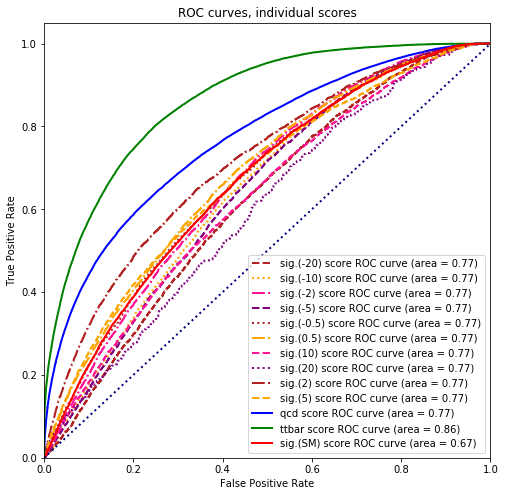

In [267]:
plt.figure(figsize=(8,8))
lw = 2
colors = cycle(['firebrick', 'orange', 'deeppink','purple'])
styles = cycle(['--', ':','-.'])
signals = ["-20","-10","-2","-5","-0.5","0.5","10","20","2","5"]
for i,color,style in zip({3,4,5,6,7,8,9,10,11,12},colors,styles):
    sig = signals[i-3]
    label = "sig.("+sig+")"
    color = color
    linestyle = style      
    plt.plot(fpr[i], tpr[i], color=color,lw=lw, linestyle = linestyle, label=label+' score ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[1], tpr[1], color='blue',
         lw=lw, label='qcd score ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='green',
         lw=lw, label='ttbar score ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot(fpr[0], tpr[0], color='red',
         lw=lw, label='sig.(SM) score ROC curve (area = %0.2f)' % roc_auc[0])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves, individual scores')
plt.legend(loc="lower right")
plt.show()

In [257]:
signals[10]

'5'

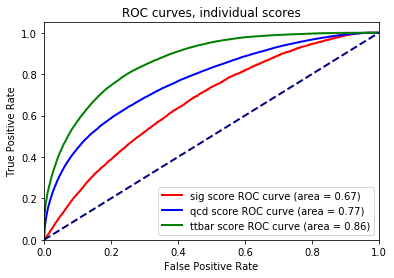

In [204]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='red',
         lw=lw, label='sig score ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='blue',
         lw=lw, label='qcd score ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='green',
         lw=lw, label='ttbar score ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves, individual scores')
plt.legend(loc="lower right")
plt.show()

In [205]:
thresholds[0][2000]

0.121347524

In [206]:
tpr[0][2000]

0.13012635779206386

In [207]:
fpr[0][2000]

0.05624435503735939

In [208]:
np.shape(tpr[0])

(17347,)

In [209]:
np.shape(fpr[0])

(17347,)

In [210]:
np.shape(thresholds[0])

(17347,)

In [211]:
np.shape(probTest)

(130812, 13)

In [212]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probTest.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

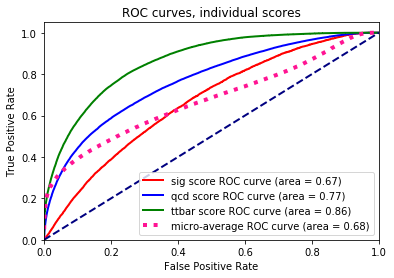

In [213]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='red',
         lw=lw, label='sig score ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='blue',
         lw=lw, label='qcd score ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='green',
         lw=lw, label='ttbar score ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves, individual scores')
plt.legend(loc="lower right")
plt.show()

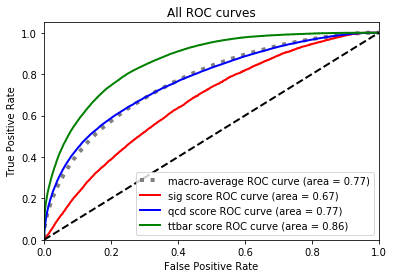

In [214]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(0,3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(0,3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
#plt.plot(fpr["micro"], tpr["micro"],
#         label='micro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["micro"]),
#         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='gray', linestyle=':', linewidth=4)

colors = cycle(['red', 'blue', 'green'])
types = cycle(['sig', 'qcd', 'ttbar'])
for i, color, typ in zip(range(0,3), colors, types):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='{0} score ROC curve (area = {1:0.2f})'.format(typ, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All ROC curves')
plt.legend(loc="lower right")
plt.show()


In [215]:
np.shape(probTest)


(130812, 13)

In [237]:
# Construct discriminant
scores_train = MyDict()
scores_test = MyDict()

# Format data for convenience
trainData = pandas.DataFrame(X_train)
testData = pandas.DataFrame(X_test)
for i in {0,3,4,5,6,7,8,9,10,11,12}:
    this_sum = 0
    this_sum_test = 0
    for j in {0,3,4,5,6,7,8,9,10,11,12}:
        if j != i:
            this_sum += probTrain[:,j]
            this_sum_test += probTest[:,j]
    scores_train[i] = np.log(probTrain[:,i]/(this_sum))
    scores_test[i] = np.log(probTest[:,i]/(this_sum_test))
    trainData['disc_'+str(i)] = pandas.Series(scores_train[i], index=trainData.index)
    trainData['sig_score_'+str(i)] = pandas.Series(probTrain[:,i], index=trainData.index)
    testData['disc_'+str(i)] = pandas.Series(scores_test[i], index=testData.index)
    testData['sig_score_'+str(i)] = pandas.Series(probTest[:,i], index=testData.index)
trainData['qcd_score'] = pandas.Series(probTrain[:,1], index=trainData.index)
trainData['top_score'] = pandas.Series(probTrain[:,2], index=trainData.index)
trainData['weight'] = pandas.Series(evtWeightsTrain, index=trainData.index)
trainData['process'] = pandas.Series(yTypeTrain, index=trainData.index)


/cvmfs/sft.cern.ch/lcg/views/LCG_94python3/x86_64-slc6-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/cvmfs/sft.cern.ch/lcg/views/LCG_94python3/x86_64-slc6-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [238]:
testData['qcd_score'] = pandas.Series(probTest[:,1], index=testData.index)
testData['top_score'] = pandas.Series(probTest[:,2], index=testData.index)
testData['weight'] = pandas.Series(evtWeightsVal, index=testData.index)
testData['process'] = pandas.Series(yTypeTest, index=testData.index)

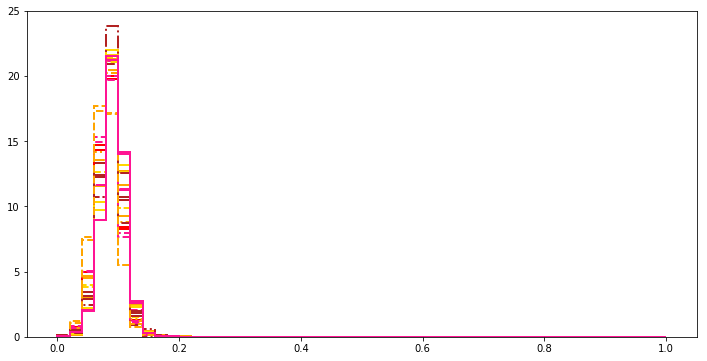

In [285]:
# Plot distributions of signal score on validation data
hist_params = {'density': True, 'bins': 50, 'linewidth': 2}
min_value = 0
max_value = 1
plt.figure(figsize=(12,6))
colors = cycle(['firebrick', 'orange', 'deeppink','gold'])
styles = cycle(['--', '-','-.'])


for i,color,style in zip({0,3,4,5,6,7,8,9,10,11,12},colors,styles):
    label = "signal"
    color = color
    lw = 2
    linestyle = style
    if (i == 0):
        label = "SM"
        lw = 2
        linestyle = '-'
        color = 'red'
    if (i == 1):
        label = "qcd"
        color = "blue"
        linestyle = '-'
        lw = 2
    if (i == 2):
        label = "ttbar"
        color = "green"
        linestyle = '-'
        lw = 2
        
    plt.hist(trainData[trainData.process == i]['sig_score_'+str(3)], linestyle = linestyle, color=color, weights=trainData[trainData.process == i]['weight'], range=(min_value, max_value), histtype='step', label='Signal', **hist_params)
    plt.hist(testData[testData.process == i]['sig_score_'+str(3)], color=color, linestyle = linestyle, weights=testData[testData.process == i]['weight'], range=(min_value, max_value), histtype='step', label='Signal', **hist_params)
#plt.hist(trainData[trainData.process == 1]['sig_score'], color=["b"], weights=trainData[trainData.process == 1]['weight'], range=(min_value, max_value), histtype='step', label='QCD', **hist_params)
#plt.hist(trainData[trainData.process == 2]['sig_score'], color=["g"], weights=trainData[trainData.process == 2]['weight'], range=(min_value, max_value), histtype='step', label='ttbar', **hist_params)
#plt.hist(testData[testData.process == 1]['sig_score'], color=["b"], linestyle = "dotted", weights=testData[testData.process == 1]['weight'], range=(min_value, max_value), histtype='step', label='QCD', **hist_params)
#plt.hist(testData[testData.process == 2]['sig_score'], color=["g"], linestyle = "dotted", weights=testData[testData.process == 2]['weight'], range=(min_value, max_value), histtype='step', label='ttbar', **hist_params)
#plt.legend(loc='best')
#plt.xlabel("signal score",fontsize=20)
#plt.ylabel("1/N dN/d(NN Score)",fontsize=20)
##plt.yscale('log')
#plt.title(analysis + " (training and validation samples)")
#plt.figure(figsize=(12,6))
#plt.hist(trainData[trainData.process == 0]['qcd_score'], color=["r"], weights=trainData[trainData.process == 0]['weight'], range=(min_value, max_value), histtype='step', label='Signal', **hist_params)
#plt.hist(trainData[trainData.process == 1]['qcd_score'], color=["b"], weights=trainData[trainData.process == 1]['weight'], range=(min_value, max_value), histtype='step', label='QCD', **hist_params)
#plt.hist(trainData[trainData.process == 2]['qcd_score'], color=["g"], weights=trainData[trainData.process == 2]['weight'], range=(min_value, max_value), histtype='step', label='ttbar', **hist_params)
#plt.hist(testData[testData.process == 0]['qcd_score'], color=["r"], linestyle = "dotted", weights=testData[testData.process == 0]['weight'], range=(min_value, max_value), histtype='step', label='Signal(Val)', **hist_params)
#plt.hist(testData[testData.process == 1]['qcd_score'], color=["b"], linestyle = "dotted", weights=testData[testData.process == 1]['weight'], range=(min_value, max_value), histtype='step', label='QCD(Val)', **hist_params)
#plt.hist(testData[testData.process == 2]['qcd_score'], color=["g"], linestyle = "dotted", weights=testData[testData.process == 2]['weight'], range=(min_value, max_value), histtype='step', label='ttbar(Val)', **hist_params)
#plt.legend(loc='best')
#plt.xlabel("qcd score",fontsize=20)
#plt.ylabel("1/N dN/d(NN Score)",fontsize=20)
#plt.title(analysis + " (training and validation samples)")
#plt.figure(figsize=(12,6))
#plt.hist(trainData[trainData.process == 0]['top_score'], color=["r"], weights=trainData[trainData.process == 0]['weight'], range=(min_value, max_value), histtype='step', label='Signal', **hist_params)
#plt.hist(trainData[trainData.process == 1]['top_score'], color=["b"], weights=trainData[trainData.process == 1]['weight'], range=(min_value, max_value), histtype='step', label='QCD', **hist_params)
#plt.hist(trainData[trainData.process == 2]['top_score'], color=["g"], weights=trainData[trainData.process == 2]['weight'], range=(min_value, max_value), histtype='step', label='ttbar', **hist_params)
#plt.hist(testData[testData.process == 0]['top_score'], color=["r"], linestyle = "dotted", weights=testData[testData.process == 0]['weight'], range=(min_value, max_value), histtype='step', label='Signal(Val)', **hist_params)
#plt.hist(testData[testData.process == 1]['top_score'], color=["b"], linestyle = "dotted", weights=testData[testData.process == 1]['weight'], range=(min_value, max_value), histtype='step', label='QCD(Val)', **hist_params)
#plt.hist(testData[testData.process == 2]['top_score'], color=["g"], linestyle = "dotted", weights=testData[testData.process == 2]['weight'], range=(min_value, max_value), histtype='step', label='ttbar(Val)', **hist_params)
#plt.legend(loc='best')
#plt.xlabel("ttbar score",fontsize=20)
#plt.ylabel("1/N dN/d(NN Score)",fontsize=20)

Text(0,0.5,'1/N dN/d(NN Score)')

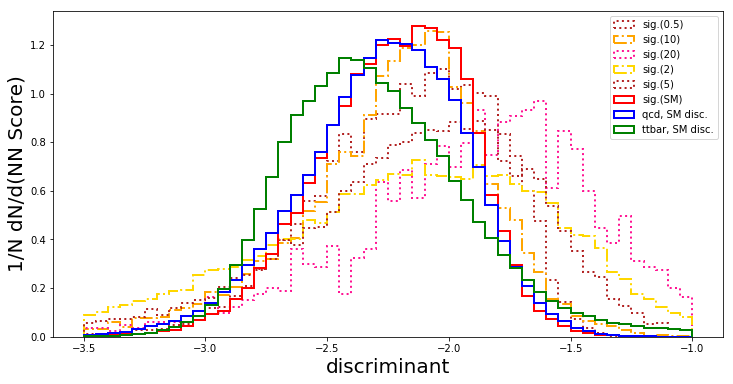

In [287]:
styles = cycle([':', '-.'])

plt.figure(figsize=(12,6))
for i,color,style in zip({8,9,10,11,12},colors,styles):
    sig = signals[i-3]
    label = "sig.("+sig+")"
    linestyle = style
    plt.hist(trainData[trainData.process == i]['disc_'+str(i)], linestyle = linestyle, color=color, weights=trainData[trainData.process == i]['weight'], histtype='step', label=label, **hist_params,range=(-3.5, -1))
    #plt.hist(testData[testData.process == i]['disc_'+str(i)], color=color, linestyle = linestyle, weights=testData[testData.process == i]['weight'], range=(min_value, max_value), histtype='step', label='Signal', **hist_params)
plt.hist(trainData[trainData.process == 0]['disc_'+str(0)], linestyle = "-", color="red", weights=trainData[trainData.process == 0]['weight'], histtype='step', label="sig.(SM)", **hist_params,range=(-3.5, -1))
plt.hist(trainData[trainData.process == 1]['disc_'+str(0)], linestyle = "-", color="blue", weights=trainData[trainData.process == 1]['weight'], histtype='step', label="qcd, SM disc.", **hist_params,range=(-3.5, -1))
plt.hist(trainData[trainData.process == 2]['disc_'+str(0)], linestyle = "-", color="green", weights=trainData[trainData.process == 2]['weight'], histtype='step', label="ttbar, SM disc.", **hist_params,range=(-3.5, -1))
plt.legend(loc='best')
plt.xlabel("discriminant",fontsize=20)
plt.ylabel("1/N dN/d(NN Score)",fontsize=20)

Text(0,0.5,'1/N dN/d(NN Score)')

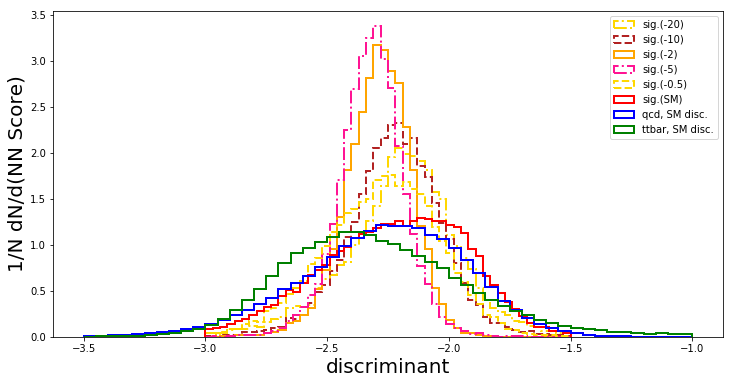

In [286]:
plt.figure(figsize=(12,6))
for i,color,style in zip({3,4,5,6,7},colors,styles):
    sig = signals[i-3]
    label = "sig.("+sig+")"
    linestyle = style
    plt.hist(trainData[trainData.process == i]['disc_'+str(i)], linestyle = linestyle, color=color, weights=trainData[trainData.process == i]['weight'], histtype='step', label=label, **hist_params,range=(-3, -1.5))
    #plt.hist(testData[testData.process == i]['disc_'+str(i)], color=color, linestyle = linestyle, weights=testData[testData.process == i]['weight'], range=(min_value, max_value), histtype='step', label='Signal', **hist_params)
plt.hist(trainData[trainData.process == 0]['disc_'+str(0)], linestyle = "-", color="red", weights=trainData[trainData.process == 0]['weight'], histtype='step', label="sig.(SM)", **hist_params,range=(-3, -1.5))
plt.hist(trainData[trainData.process == 1]['disc_'+str(0)], linestyle = "-", color="blue", weights=trainData[trainData.process == 1]['weight'], histtype='step', label="qcd, SM disc.", **hist_params,range=(-3.5, -1))
plt.hist(trainData[trainData.process == 2]['disc_'+str(0)], linestyle = "-", color="green", weights=trainData[trainData.process == 2]['weight'], histtype='step', label="ttbar, SM disc.", **hist_params,range=(-3.5, -1))
plt.legend(loc='best')
plt.xlabel("discriminant",fontsize=20)
plt.ylabel("1/N dN/d(NN Score)",fontsize=20)

In [243]:
print(np.unique(yTypeRun,return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([ 30372, 153682, 124071,  11301,  14502,  14750,  14556,  15096,
        15566,  13396,   1416,  14559,  12773]))


In [244]:
##append_mc_sf = signalAppendData.pop("mc_sf")
#append_mc_sf = X_run.pop("mc_sf")
#append_mc_sf = append_mc_sf.values
## Convert pandas dataframes into numpy arrays
## signalAppendData = signalAppendData.values
#X_run = X_run.values

The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.

In [69]:
X_run_clone = X_run
X_run_forload = X_run
appendData_clone = pandas.DataFrame(X_run_clone)

X_run = classStd1.transform(X_run)


In [70]:
# Run training sample back through the NN
probAppend = model.predict(X_run)

In [71]:
# Format data for convenience
appendData = pandas.DataFrame(X_run)
appendData['sig_score'] = pandas.Series(probAppend[:,0], index=appendData.index)
appendData['qcd_score'] = pandas.Series(probAppend[:,1], index=appendData.index)
appendData['top_score'] = pandas.Series(probAppend[:,2], index=appendData.index)
appendData['weight'] = pandas.Series(evtWeightsRun, index=appendData.index)
appendData['process'] = pandas.Series(yTypeRun, index=appendData.index)


print("signal score mean = ", statistics.mean(appendData['sig_score']))
print("   QCD score mean = ", statistics.mean(appendData['qcd_score']))
print(" ttbar score mean = ", statistics.mean(appendData['top_score']))

signal score mean =  0.048669679339775916
   QCD score mean =  0.058831766147861043
 ttbar score mean =  0.04495639049864028


In [72]:
probAppend[:,2]
len(appendData[appendData.process == 2])
print(np.unique(yTypeRun,return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([ 17027, 412063,  24234,   8231,  11008,  13238,  11868,  14838,
        17830,   8726,    978,  23462,   8532]))


Text(0,0.5,'1/N dN/d(NN Score)')

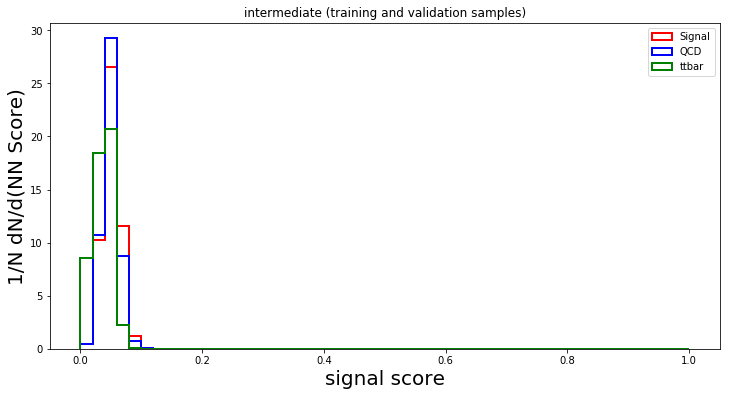

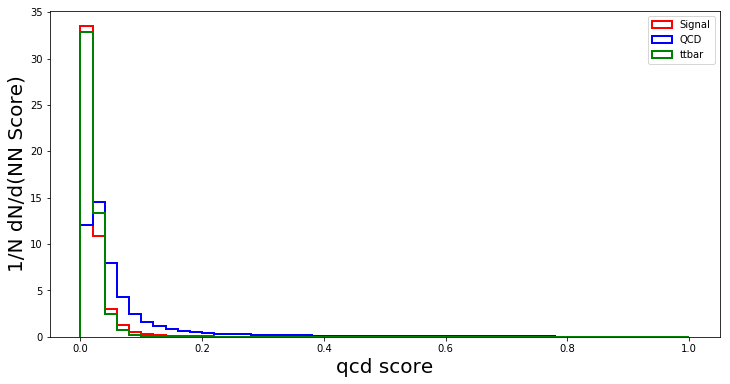

In [73]:
# Plot distributions of signal score on validation data
hist_params = {'density': True, 'bins': 50, 'linewidth': 2}
min_value = 0
max_value = 1
plt.figure(figsize=(12,6))
plt.hist(appendData[appendData.process == 0]['sig_score'], color=["r"], weights=appendData[appendData.process == 0]['weight'], range=(min_value, max_value), histtype='step', label='Signal', **hist_params)
plt.hist(appendData[appendData.process == 1]['sig_score'], color=["b"], weights=appendData[appendData.process == 1]['weight'], range=(min_value, max_value), histtype='step', label='QCD', **hist_params)
plt.hist(appendData[appendData.process == 2]['sig_score'], color=["g"], weights=appendData[appendData.process == 2]['weight'], range=(min_value, max_value), histtype='step', label='ttbar', **hist_params)
plt.legend(loc='best')
plt.xlabel("signal score",fontsize=20)
plt.ylabel("1/N dN/d(NN Score)",fontsize=20)
#plt.yscale('log')
plt.title(analysis + " (training and validation samples)")
plt.figure(figsize=(12,6))
plt.hist(appendData[appendData.process == 0]['qcd_score'], color=["r"], weights=appendData[appendData.process == 0]['weight'], range=(min_value, max_value), histtype='step', label='Signal', **hist_params)
plt.hist(appendData[appendData.process == 1]['qcd_score'], color=["b"], weights=appendData[appendData.process == 1]['weight'], range=(min_value, max_value), histtype='step', label='QCD', **hist_params)
plt.hist(appendData[appendData.process == 2]['qcd_score'], color=["g"], weights=appendData[appendData.process == 2]['weight'], range=(min_value, max_value), histtype='step', label='ttbar', **hist_params)
plt.legend(loc='best')
plt.xlabel("qcd score",fontsize=20)
plt.ylabel("1/N dN/d(NN Score)",fontsize=20)

Text(0,0.5,'leading higgs candidate mass')

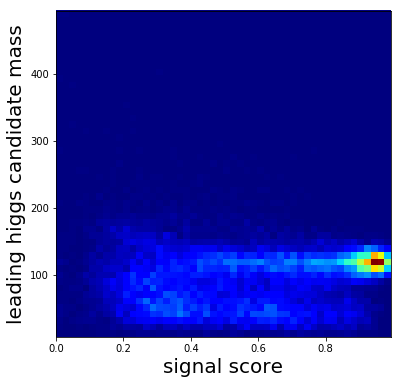

In [35]:
appendData_clone['process'] = pandas.Series(yTypeRun, index=appendData.index)
plt.figure(figsize=(6,6))
plt.hist2d(appendData[appendData.process == 0]['sig_score'],appendData_clone[appendData_clone.process == 0][3],bins=(50,50),cmap=plt.cm.jet)
plt.xlabel("signal score",fontsize=20)
plt.ylabel("leading higgs candidate mass",fontsize=20)

In [36]:
plt.savefig("nn_vs_h1M_signal.png")

<Figure size 432x288 with 0 Axes>

In [37]:
appendData_clone.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,process
0,186.631434,0.0,0.0,68.361534,253.323441,-0.524437,-2.601593,0.228536,73.704294,121.510046,1.568009,-0.232106,1.085954,40.007195,-1.604813,0.0,0.0,0.0,0.0,1
1,19.246565,0.0,0.0,32.864246,301.971924,0.637259,0.767390,0.789446,155.638248,285.364342,2.445060,-2.341065,1.406430,22.644180,-2.209389,1.0,0.0,1.0,1.0,1
2,309.985355,0.0,0.0,77.471573,569.283447,1.573768,2.441730,0.269151,171.550151,300.508743,0.760250,-0.324270,1.021325,95.283180,-0.824976,0.0,0.0,0.0,1.0,1
3,303.275969,0.0,0.0,116.438461,319.647095,-1.195304,2.025725,0.799697,128.058219,38.536932,0.516869,-2.192588,3.137063,15.753584,-1.177011,1.0,0.0,1.0,0.0,1
4,247.359568,0.0,0.0,93.953156,461.447540,1.474505,-1.597965,0.640714,153.017616,227.548474,1.075794,1.294602,1.200118,68.352905,1.596076,0.0,1.0,1.0,1.0,1


In [38]:
loaded_model = keras.models.load_model("./testingAppend.h5")
loaded_scaler = joblib.load("scaler_testingAppend.sav")
X_run_forload = classStd1.transform(X_run_forload)



Text(0,0.5,'1/N dN/d(NN Score)')

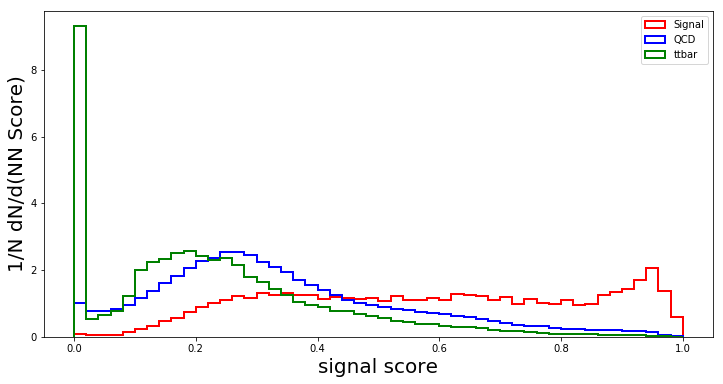

In [39]:
pred_loaded = loaded_model.predict(X_run_forload)

loaded_model_Data = pandas.DataFrame(X_run_forload)
loaded_model_Data['sig_score'] = pandas.Series(pred_loaded[:,0], index=loaded_model_Data.index)
loaded_model_Data['qcd_score'] = pandas.Series(pred_loaded[:,1], index=loaded_model_Data.index)
loaded_model_Data['top_score'] = pandas.Series(pred_loaded[:,2], index=loaded_model_Data.index)
loaded_model_Data['weight'] = pandas.Series(evtWeightsRun, index=loaded_model_Data.index)
loaded_model_Data['process'] = pandas.Series(yTypeRun, index=loaded_model_Data.index)

hist_params = {'density': True, 'bins': 50, 'linewidth': 2}
min_value = 0
max_value = 1
plt.figure(figsize=(12,6))
plt.hist(loaded_model_Data[loaded_model_Data.process == 0]['sig_score'], color=["r"], weights=loaded_model_Data[loaded_model_Data.process == 0]['weight'], range=(min_value, max_value), histtype='step', label='Signal', **hist_params)
plt.hist(loaded_model_Data[loaded_model_Data.process == 1]['sig_score'], color=["b"], weights=loaded_model_Data[loaded_model_Data.process == 1]['weight'], range=(min_value, max_value), histtype='step', label='QCD', **hist_params)
plt.hist(loaded_model_Data[loaded_model_Data.process == 2]['sig_score'], color=["g"], weights=loaded_model_Data[loaded_model_Data.process == 2]['weight'], range=(min_value, max_value), histtype='step', label='ttbar', **hist_params)
plt.legend(loc='best')
plt.xlabel("signal score",fontsize=20)
plt.ylabel("1/N dN/d(NN Score)",fontsize=20)

In [40]:
pred_sig_only = model.predict(allXdata_scaled)

Text(0,0.5,'1/N dN/d(NN Score)')

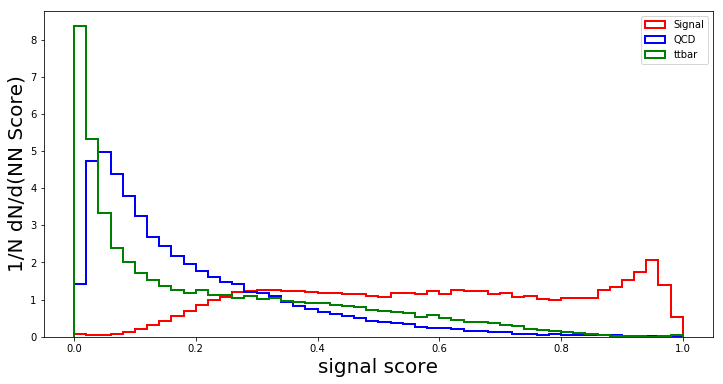

In [41]:
sig_only_Data = pandas.DataFrame(allXdata_scaled)
sig_only_Data['sig_score'] = pandas.Series(pred_sig_only[:,0], index=sig_only_Data.index)
sig_only_Data['qcd_score'] = pandas.Series(pred_sig_only[:,1], index=sig_only_Data.index)
sig_only_Data['top_score'] = pandas.Series(pred_sig_only[:,2], index=sig_only_Data.index)

hist_params = {'density': True, 'bins': 50, 'linewidth': 2}
min_value = 0
max_value = 1
plt.figure(figsize=(12,6))
plt.hist(sig_only_Data['sig_score'], color=["r"], range=(min_value, max_value), histtype='step', label='Signal', **hist_params)
plt.hist(sig_only_Data['qcd_score'], color=["b"], range=(min_value, max_value), histtype='step', label='QCD', **hist_params)
plt.hist(sig_only_Data['top_score'], color=["g"], range=(min_value, max_value), histtype='step', label='ttbar', **hist_params)
plt.legend(loc='best')
plt.xlabel("signal score",fontsize=20)
plt.ylabel("1/N dN/d(NN Score)",fontsize=20)

/cvmfs/sft.cern.ch/lcg/views/LCG_94python3/x86_64-slc6-gcc8-opt/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0,0.5,'1/N dN/d(NN Score)')

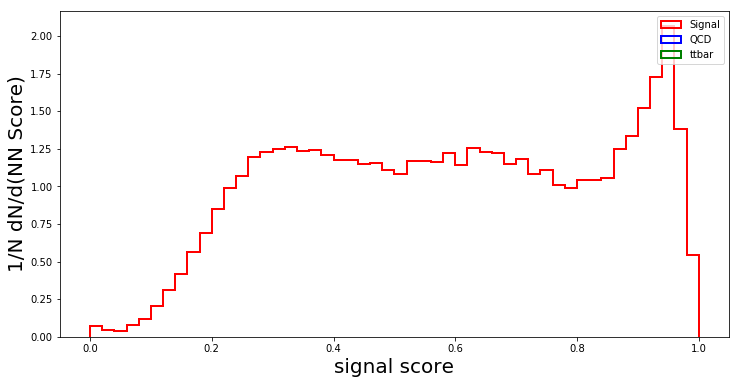

In [42]:
sig_only_Data['weight'] = pandas.Series(sig_only_mc_sf, index=sig_only_Data.index)
sig_only_Data['process'] = pandas.Series(sig_only_target, index=sig_only_Data.index)

hist_params = {'density': True, 'bins': 50, 'linewidth': 2}
min_value = 0
max_value = 1
plt.figure(figsize=(12,6))
plt.hist(sig_only_Data[sig_only_Data.process == 0]['sig_score'], color=["r"], weights=sig_only_Data[sig_only_Data.process == 0]['weight'], range=(min_value, max_value), histtype='step', label='Signal', **hist_params)
plt.hist(sig_only_Data[sig_only_Data.process == 1]['sig_score'], color=["b"], weights=sig_only_Data[sig_only_Data.process == 1]['weight'], range=(min_value, max_value), histtype='step', label='QCD', **hist_params)
plt.hist(sig_only_Data[sig_only_Data.process == 2]['sig_score'], color=["g"], weights=sig_only_Data[sig_only_Data.process == 2]['weight'], range=(min_value, max_value), histtype='step', label='ttbar', **hist_params)
plt.legend(loc='best')
plt.xlabel("signal score",fontsize=20)
plt.ylabel("1/N dN/d(NN Score)",fontsize=20)